In [79]:
import numpy as np 
from tqdm import tqdm
import matplotlib.pyplot as plt 




In [80]:
x_enter = np.array(([3, 1.5],[2,1],[4,1.5],[3,1],[3.5,0.5], [2, 0.5],[5.5,1],[1,1],[4,1.5]),dtype=float) # données d'entrer

# données de sortie / 1 = rouge / 0 = bleu
y = np.array(([1],[0],[1],[0],[1],[0],[1],[0]),dtype=float) # Les résultats attendus à la sortie

x_enter = x_enter/np.amax(x_enter, axis=0) # récupère 8 premiers éléments

x=np.split(x_enter,[8])[0] # normalisation des données d'entrée

xPrediction = np.split(x_enter,[8])[1]



In [81]:
class Neural_Network(object):
    def __init__(self):
        self.inputsize = 2
        self.outputsize = 1
        self.hiddensize = 3
        self.loos=[]
        
        self.W1 = np.random.randn(self.inputsize, self.hiddensize)
        self.W2 = np.random.randn(self.hiddensize,self.outputsize)

    
    def forward(self, X):
        self.z = np.dot(X, self.W1)
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.dot(self.z2, self.W2)
        o = self.sigmoid(self.z3)
        return o
    
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))

    def sigmoidPrime(self, s):
        return s*(1-s)

    def backward(self, X, y, o):
        self.o_error =  y - o 
        self.o_delta = self.o_error*self.sigmoidPrime(o)

        self.z2_error = self.o_delta.dot(self.W2.T)
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2)

        self.W1 += X.T.dot(self.z2_delta)
        self.W2 += self.z2.T.dot(self.o_delta)

    def log_loss(self, y_true, y_pred):
        epsilon = 1e-15
        return 1/len(y_true) * np.sum(-y_true * np.log(y_pred + epsilon) - (1 -y_true) * np.log(1 - y_pred  + epsilon))
    
    def train(self, X, y, iterations):
        for i in tqdm(range(iterations)):
            o = self.forward(X)
            if(i%10==0):
                Loos = self.log_loss(y, o)
                self.loos.append(Loos)
            self.backward(X, y, o)


100%|██████████| 9000/9000 [00:00<00:00, 20525.70it/s]


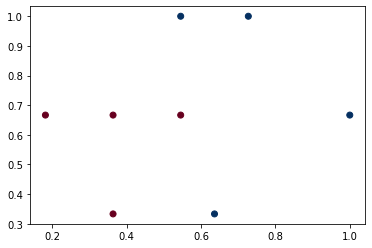

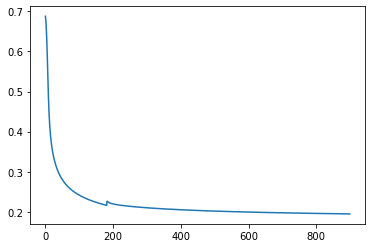

valeur d'entrée: 
[[0.54545455 1.        ]
 [0.36363636 0.66666667]
 [0.72727273 1.        ]
 [0.54545455 0.66666667]
 [0.63636364 0.33333333]
 [0.36363636 0.33333333]
 [1.         0.66666667]
 [0.18181818 0.66666667]]
valeur de sortie: 
[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]]
valeur de sortie prédite: 
[[0.83]
 [0.03]
 [0.98]
 [0.67]
 [0.81]
 [0.01]
 [1.  ]
 [0.  ]]
valeur de sortie prédite: 
[[0.98]]


In [82]:
import matplotlib.pyplot as plt 

NN = Neural_Network()

NN.train(x,y, iterations = 9000)
""" o = NM.forward(x)"""
plt.scatter(x[:, 0], x[:, 1], c=y, cmap="RdBu")
plt.show()

plt.plot(NN.loos)
plt.show()


print("valeur d'entrée: \n"+str(x))
print("valeur de sortie: \n"+str(y))

print("valeur de sortie prédite: \n"+str(np.matrix.round(NN.forward(x),decimals=2)))
l = NN.forward(xPrediction)
print("valeur de sortie prédite: \n"+str(np.matrix.round(l,decimals=2)))




